In [2]:
import re
import pickle

In [3]:
input_file=open('wiki_separate.txt','r',encoding='utf-8')
#output_file=open('wiki_separate_remove_test.txt','w',encoding='utf-8')

In [4]:
lines=input_file.readlines()
for line in lines:
    lines_list=line.split('\n')[0].split(' ')
    
    lines_list_new=[]
    for line_sp in lines_list:
        if re.search('^[\u4e00-\u9fa5]+$',line_sp):
            lines_list_new.append(line_sp)
    #output_file.writelines(''.join(lines_list_new)+'\n')
    with open('lines_list_pickle','wb') as f:
        pickle.dump(lines_list_new,f)
    

In [5]:
with open('lines_list_pickle','rb') as f:
    lines_wiki_list=pickle.load(f)

In [20]:
import re

In [77]:
input_file_name='wiki_separate_remove.txt'

In [78]:
import multiprocessing
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence


In [79]:
    model = Word2Vec(LineSentence(input_file_name),
                     size=200,  # 词向量长度为200
                     window=5,
                     min_count=5,
                     workers=multiprocessing.cpu_count())

In [80]:
model.save('word2vec.model')

In [81]:
model.wv['数学']

array([ 0.63130146, -1.1710899 ,  0.25690022, -0.3675391 , -1.5724324 ,
       -1.7788769 , -1.7124549 , -2.4663293 ,  0.8046068 , -0.8216986 ,
       -0.21827883, -0.8110801 , -3.2204034 ,  2.296982  , -1.1268525 ,
       -0.35081995, -1.2145457 , -0.6976201 , -2.1334875 ,  0.86325616,
        2.0458286 , -1.6545976 , -2.620606  , -0.3738303 , -1.0950079 ,
       -1.7502654 , -1.1517242 ,  0.84436184, -0.6925997 ,  0.50720507,
        0.2970502 ,  1.5057201 , -1.8490312 , -0.2608847 , -0.47309637,
        0.2196478 , -0.5513503 ,  0.13042107, -2.3725576 ,  1.5085269 ,
        1.9754455 , -0.00991524, -0.23288862,  0.14402437,  0.77967924,
        1.527009  ,  0.06853063, -0.2259279 ,  0.39981002,  1.6364082 ,
        2.4385414 , -0.13124737, -0.16824274,  0.8637763 , -1.061715  ,
       -1.6633873 , -0.84552354,  1.475101  ,  1.1286709 ,  2.2338896 ,
        0.02334576,  2.9483743 ,  0.36937404, -0.8406572 , -3.1152902 ,
       -1.3882565 , -1.4883566 , -0.26389787,  1.2977556 , -0.18

In [82]:
model.most_similar(["女人"]+["数学"])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('女孩子', 0.6671199798583984),
 ('男人', 0.6640897989273071),
 ('哲学', 0.5996290445327759),
 ('女孩', 0.5865527391433716),
 ('直觉', 0.5834563970565796),
 ('平凡', 0.5827770829200745),
 ('几何学', 0.580751895904541),
 ('代数', 0.5757765173912048),
 ('爱情', 0.5708840489387512),
 ('逻辑学', 0.5665276050567627)]

In [83]:
model.wv.distances('凉爽','酷热')

array([0.93270266, 0.5490807 ], dtype=float32)

In [84]:
model.wv.most_similar(positive=['女儿', '爸爸'], negative=['妈妈'])

[('姐姐', 0.768647313117981),
 ('哥哥', 0.745911180973053),
 ('弟弟', 0.744389533996582),
 ('妹妹', 0.744227945804596),
 ('儿子', 0.7322788238525391),
 ('姊姊', 0.7125065326690674),
 ('侄女', 0.7081958055496216),
 ('妻子', 0.7050031423568726),
 ('孙儿', 0.6885561347007751),
 ('小儿子', 0.685295581817627)]

In [85]:
model['女人'].shape

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(200,)

In [86]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [87]:
import pickle 
from gensim.models import Word2Vec

In [88]:
model.most_similar(["酷热"]+["数学"]+['爸妈']+['美丽']+['大小']+['陶渊明'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('俏丽', 0.6648873686790466),
 ('随性', 0.6644477844238281),
 ('淋漓', 0.6485873460769653),
 ('难测', 0.6485532522201538),
 ('动人', 0.6447727680206299),
 ('伤感', 0.6436501741409302),
 ('炯炯有神', 0.6409033536911011),
 ('欢愉', 0.6401305198669434),
 ('羞涩', 0.6374083757400513),
 ('深情', 0.6366919875144958)]

In [89]:
model=Word2Vec.load('wiki.model')

In [90]:
model.wv.vocab['数学'].count

7202

In [91]:
words=['数学','历史','生产','算术', '今日', '空间']

In [92]:
def similar_plot(model):
    labels = []
    tokens = []

    for word in words:
        tokens.append(model[word])
        labels.append(word)
        for similar,_ in model.wv.most_similar(word,topn=50):
            tokens.append(model[similar])
            labels.append(similar)
    
    tsne_model = TSNE(perplexity=40,  init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


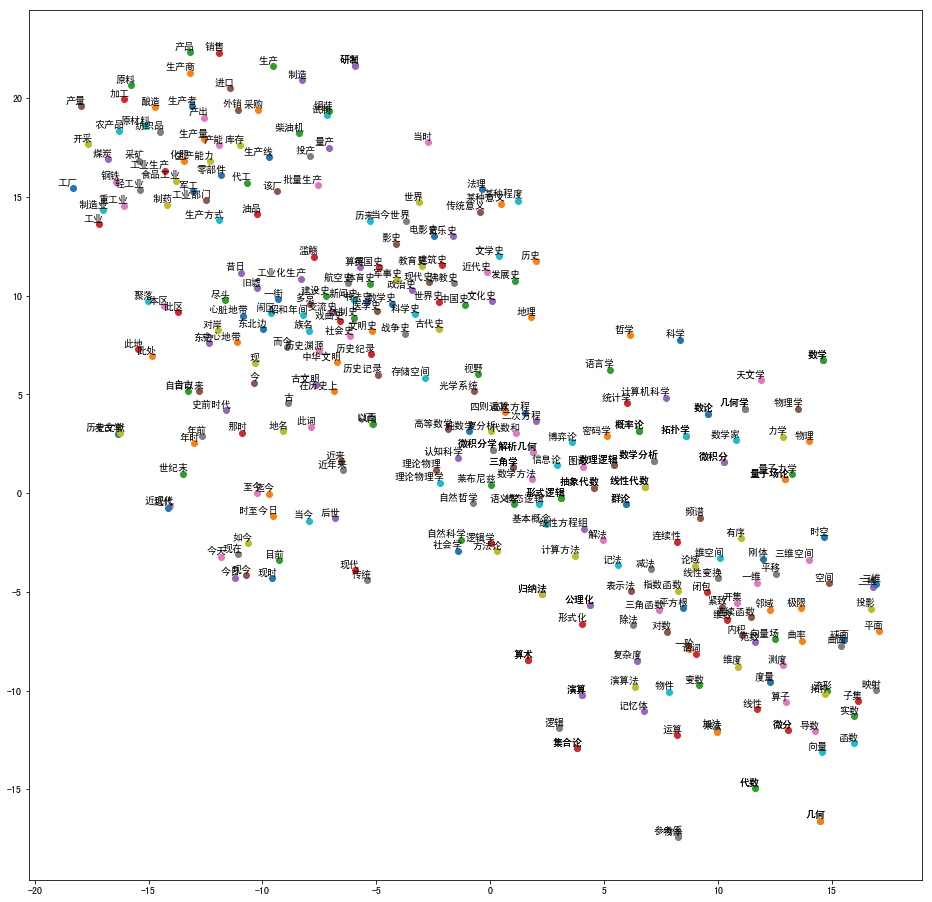

In [93]:
similar_plot(model)

In [94]:
model.wv.doesnt_match(['中国','美国','叙利亚','水果'])

/anaconda3/lib/python3.7/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'水果'

In [100]:
model.wv.save_word2vec_format('wiki_separate_remove_model_ver.txt')


In [98]:
model.wv.vocab

{'数学': <gensim.models.keyedvectors.Vocab at 0x16fcdfeb8>,
 '是': <gensim.models.keyedvectors.Vocab at 0x16fcdff60>,
 '利用': <gensim.models.keyedvectors.Vocab at 0x16fcdffd0>,
 '符号语言': <gensim.models.keyedvectors.Vocab at 0x16fcea048>,
 '研究': <gensim.models.keyedvectors.Vocab at 0x16fcea080>,
 '数量': <gensim.models.keyedvectors.Vocab at 0x16fcea0b8>,
 '结构': <gensim.models.keyedvectors.Vocab at 0x16fcea0f0>,
 '变化': <gensim.models.keyedvectors.Vocab at 0x16fcea128>,
 '以及': <gensim.models.keyedvectors.Vocab at 0x16fcea160>,
 '空间': <gensim.models.keyedvectors.Vocab at 0x16fcea198>,
 '等': <gensim.models.keyedvectors.Vocab at 0x16fcea1d0>,
 '概念': <gensim.models.keyedvectors.Vocab at 0x16fcea208>,
 '的': <gensim.models.keyedvectors.Vocab at 0x16fcea240>,
 '一门': <gensim.models.keyedvectors.Vocab at 0x16fcea278>,
 '学科': <gensim.models.keyedvectors.Vocab at 0x16fcea2b0>,
 '从': <gensim.models.keyedvectors.Vocab at 0x16fcea2e8>,
 '某种': <gensim.models.keyedvectors.Vocab at 0x16fcea320>,
 '角度看': <gensim.

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import random
#因为词向量文件比较大，全部可视化就什么都看不见了，所以随机抽取一些词可视化
def tran_plot(model):
    words = list(model.wv.vocab)
    random.shuffle(words)
    vector = model[words]
    tsne = TSNE(n_components=2,init='pca',verbose=1)
    embedd = tsne.fit_transform(vector)
 #可视化
    plt.figure(figsize=(14,10))
    plt.scatter(embedd[:300,0], embedd[:300,1])
 
    for i in range(300):

        x = embedd[i][0]
        y = embedd[i][1]
        plt.text(x, y, words[i])
    plt.show()
